# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [85]:
#Currently the campaign method is through phone call
#It was often necessary to make more than one contact with the same client to determine whether the product (bank term deposit) would be subscribed ('yes') or not.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [87]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [88]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [89]:
#View the first 5 rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Explore and clean the dataset

In [90]:
df.isnull().sum()
#there are no missing values in the dataset

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [91]:
#Let's explore categorical features

In [92]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [93]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [94]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [95]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [96]:
#target variable
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Text(0.5, 1.0, 'target feature')

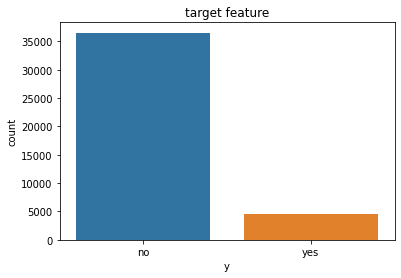

In [97]:
sns.countplot(x=df['y'])
plt.title("target feature")

In [98]:
#The target feature is imbalanced

Text(0, 0.5, 'count')

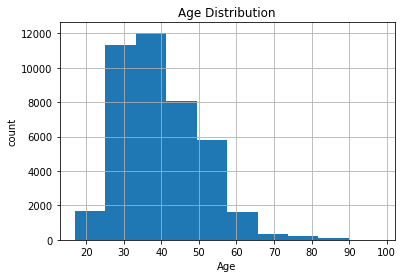

In [99]:
#Distribution of age
df['age'].hist()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("count")

## Relationship between call duration and campaign in regards with the target outcome

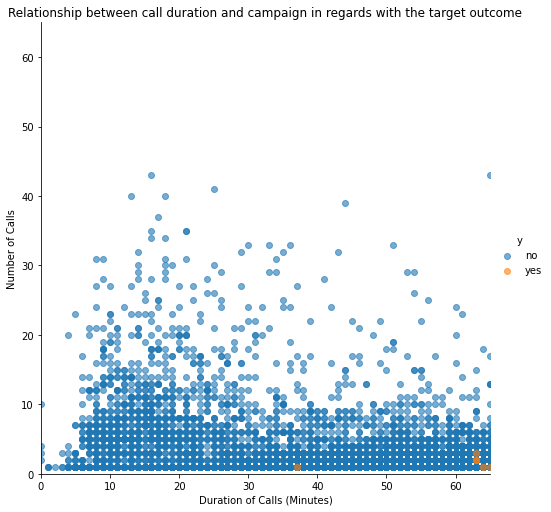

In [100]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('Relationship between call duration and campaign in regards with the target outcome')



plt.show()

In [101]:
df['y'] = df['y'].map({"no":0,"yes":1})

Text(0.5, 1.0, 'correlation matrix')

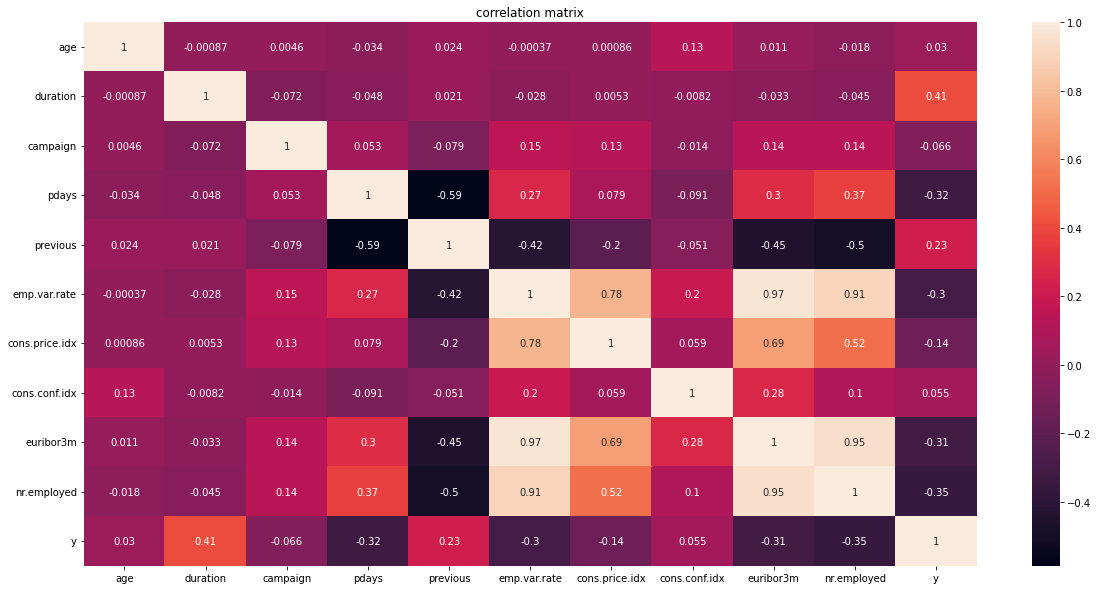

In [102]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

plt.title("correlation matrix")

In [103]:
#looks like the customer price index and number of employees are highly correlated
#And euribar three month and the number of employees are also highly correlated
#Also, duration of the call and previous contact are highly correlated with the target feature

# Subscription rate by job

In [104]:
count_job_response_pct = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

In [105]:
count_job_response_pct

y,0,1
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


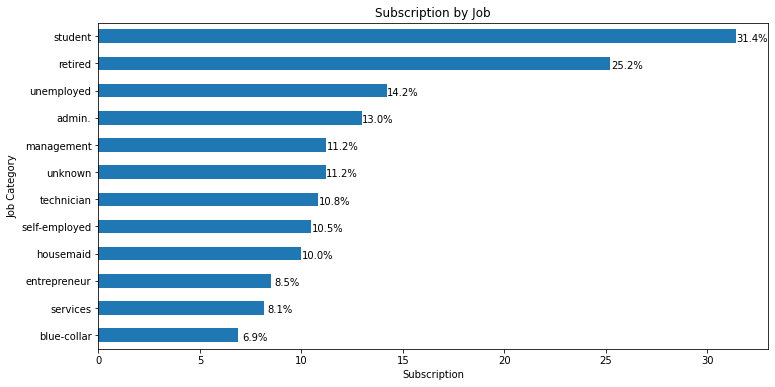

In [106]:
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription by Job')
plt.xlabel('Subscription')
plt.ylabel('Job Category')


for rec, label in zip(plot_job.patches,
                      count_job_response_pct[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [107]:
# From the above analysis it is clear that it is best to contact the students and the retired clients

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


*   The main objective is to analyze the customer features such as their job, education, marital status, their previous response to 
campaign calls etc.
*   By undertanding the customers in depth helps in improving to target the right customers.
Also improves the customers satisfaction



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [109]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [110]:
cat_cols = ['job',"marital","education","default","housing","loan","contact",
            "month","day_of_week","poutcome"]
le = preprocessing.LabelEncoder()

for i in cat_cols:
    df[i] = le.fit_transform(df[i])

In [111]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [113]:
X = df.drop('y', axis=1)
y =df['y']

In [114]:
X.shape, y.shape

((41188, 20), (41188,))

In [115]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [116]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30891, 20), (30891,), (10297, 20), (10297,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [117]:
from sklearn.dummy import DummyClassifier

In [118]:
dummy_clf = DummyClassifier(strategy="stratified")

In [119]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [120]:
preds = dummy_clf.predict(X_test)

In [121]:
accuracy_score(y_test, preds)

0.8049917451684957

In [122]:
# With dummy classifier we got the accuracy of 79% 


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [123]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9094882004467321

### Problem 9: Score the Model

What is the accuracy of your model?

In [124]:
# With the simple logistic regression model we received the accuracy of 90%

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [126]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    
    "Decision Tree": DecisionTreeClassifier()
    
    
}

In [127]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train,X_test,Y_test,verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [128]:
df_results = batch_classify(X_train, y_train, X_test, y_test)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 1.32 s
trained Nearest Neighbors in 0.01 s
trained Linear SVM in 17.35 s
trained Decision Tree in 0.17 s
            classifier  train_score  training_time  test_score
3        Decision Tree     1.000000       0.165794    0.888123
1    Nearest Neighbors     0.931307       0.013475    0.902884
0  Logistic Regression     0.907287       1.324196    0.909488
2           Linear SVM     0.897996      17.354613    0.896863


In [129]:
#Training time for Nearest neighbors is less than the other models
# Test score for Nearest neighbors and Logistic regression are almost same


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [130]:
#Let's look for the top few important features 

In [131]:
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'Top Features derived by Random Forest')

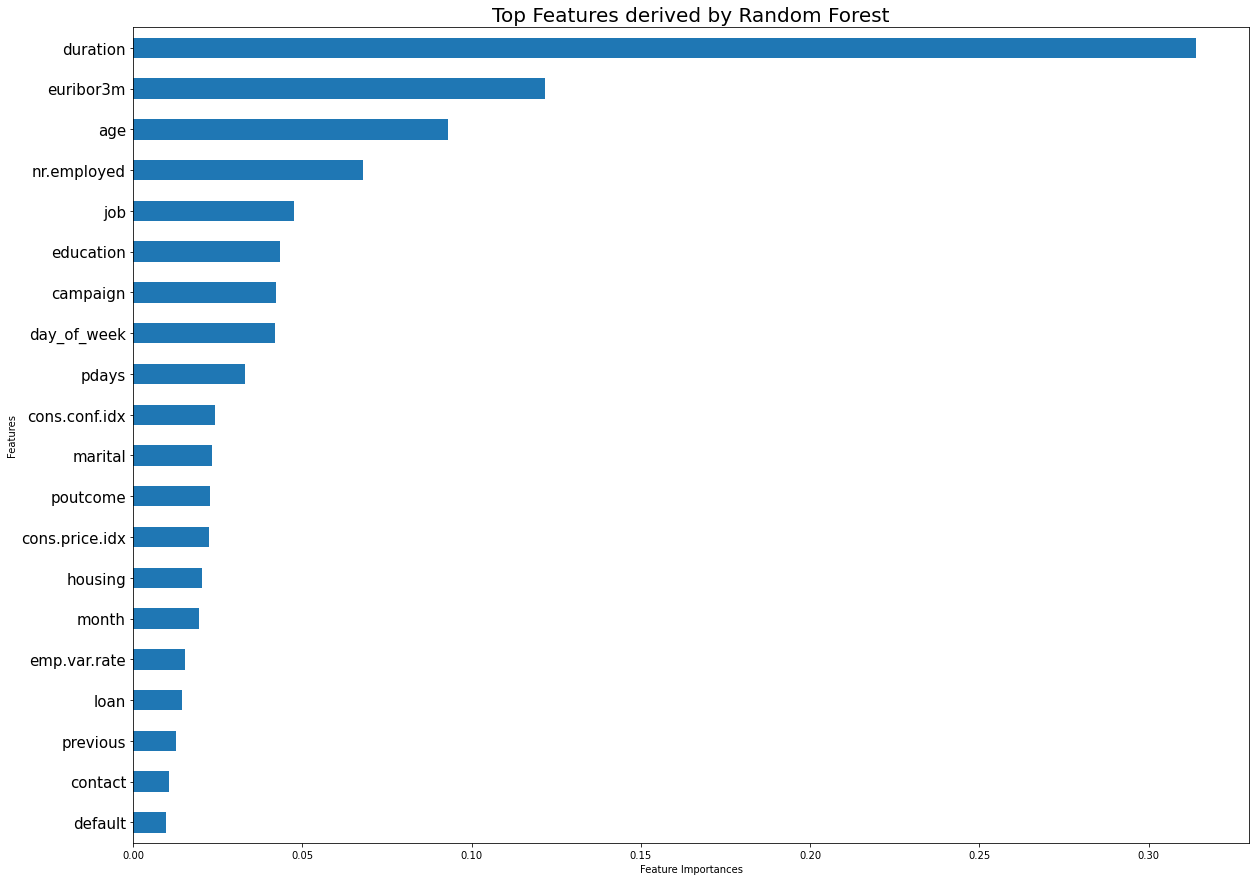

In [132]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100)

# Train model, note that NO scaling is required
model = rfc.fit(X_train, y_train)

# Plot the top features based on its importance
(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(47)   # can adjust based on how many top features you want
   .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title('Top Features derived by Random Forest', size=20)

In [133]:
##Let's implement the model with top 10 important features


In [134]:
features = ["duration","euribor3m","age","nr.employed","job","education",
            "campaign","day_of_week","pdays","cons.conf.idx"]

In [135]:
X_feat = X[features]

In [136]:
y_feat = y.copy()

In [137]:
#Decision Tree Classifier with important features
from sklearn.model_selection import GridSearchCV

In [138]:
X_train, X_test, y_train, y_test= train_test_split(X_feat, y_feat, test_size=0.25, random_state=42)

In [139]:
param_grid = {'criterion': ['gini', 'entropy'], 
              'splitter': ['best', 'random'], 
              'max_depth': [2,4,6,8,10,None], 
              'min_samples_split': [2,5,10,.03,.05],
              'min_samples_leaf': [1,5,10,.03,.05], 
              'max_features': [None, 'auto'], 
              'random_state': [0] 
             }

In [140]:
tune_model = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid=param_grid, 
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
tune_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05],
                         'min_samples_split': [2, 5, 10, 0.03, 0.05],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='roc_auc')

In [141]:
#build a model with the best params
tune_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.03,
 'random_state': 0,
 'splitter': 'best'}

In [142]:
dt_best =  DecisionTreeClassifier(criterion='entropy',
                                   min_samples_split=0.03,
                                   max_depth=10,
                                    max_features = None,
                                   min_samples_leaf=1,
                                   random_state = 0,
                                   splitter='best')

dt_best.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_samples_split=0.03, random_state=0)

In [143]:
pred = dt_best.predict(X_test)


In [144]:
accuracy_score(y_test, pred)

0.9118189764008935

In [145]:
#Test score for Decision tree classifier improved by 2%
#since it is imbalanced data it is also best to look for other metrics such as f1-score

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [147]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9144
           1       0.63      0.50      0.56      1153

    accuracy                           0.91     10297
   macro avg       0.79      0.73      0.76     10297
weighted avg       0.90      0.91      0.91     10297



Text(0.5, 1.0, 'Decision Tree- Confusion matrix')

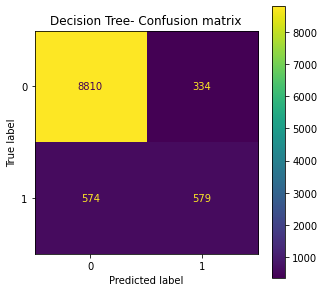

In [148]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_confusion_matrix(dt_best,X_test,y_test,ax=ax)
plt.title("Decision Tree- Confusion matrix")

In [149]:
#KNN - Gridsearch

In [150]:
knn = KNeighborsClassifier()

In [151]:
gs_knn=GridSearchCV(knn,
               param_grid={'n_neighbors':[4,5,6,7]},
               scoring='accuracy',
               cv=10)


gs_knn_scores = cross_val_score(gs_knn, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_knn.fit(X_train, y_train)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(X_test, y_test)*100))

Train Accuracy:   92.5%
CV Mean Accuracy: 90.5%
Test Accuracy:    90.6%


Text(0.5, 1.0, 'knn- Confusion matrix')

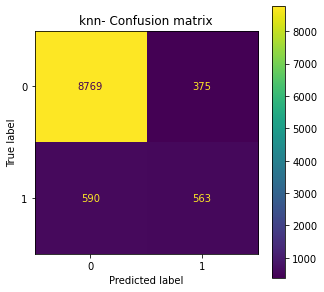

In [152]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_confusion_matrix(gs_knn_best,X_test,y_test,ax=ax)
plt.title("knn- Confusion matrix")

## comparing all the models, the best model is Gridsearch - Decision tree classifier

## Recommendations



*   Customer age affects the outcome, it is best to concentrate on customers with age below 30 and above 50.
*   The duration of the call, plays a major role in predicting the term deposit subscription.


*   Job also an important features. Based on the findings, it is best to focus on students as well as retired customers.




